In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

In [14]:
df = pd.read_csv('n_cleaned_data.csv')
df['Score Group'] = df['GSQS: Score'].apply(lambda x: 'normale slaapkwaliteit' if x < 6 else 'slechte slaapkwaliteit')
df.rename(columns={'Go-No Go task: Aantal No-go fout': 'Go-No Go task: Aantal No-Go fout'}, inplace=True)

print(shapiro(df['GSQS: Score']))

ShapiroResult(statistic=0.952089250087738, pvalue=0.0052443258464336395)


C:\Users\Alvin\AppData\Local\Temp\ipykernel_16272\2796341403.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(y=df['Go-No Go task: Aantal No-Go fout'], x=df['Score Group'], ci=False)


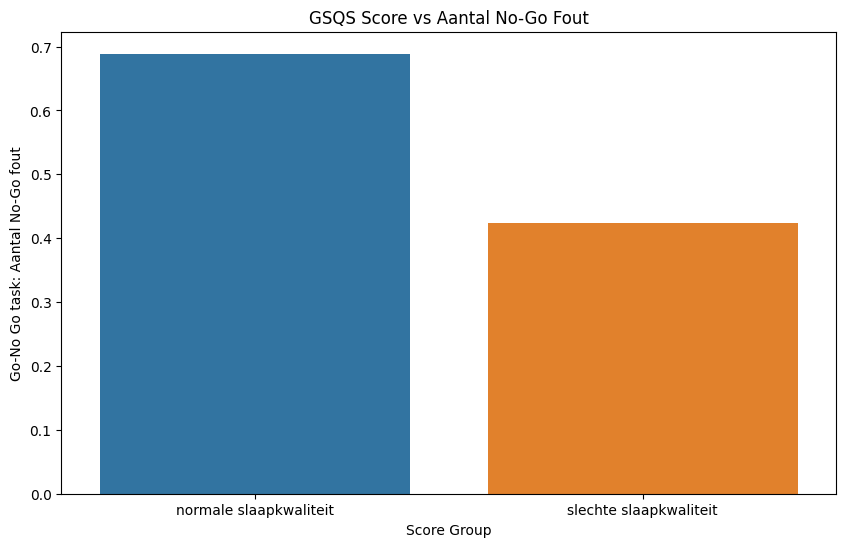

              Score Group  Go-No Go task: Aantal No-Go fout
0  normale slaapkwaliteit                          0.688889
1  slechte slaapkwaliteit                          0.424242


In [21]:
Q1 = df['Go-No Go task: Aantal No-Go fout'].quantile(0.25)
Q3 = df['Go-No Go task: Aantal No-Go fout'].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5 * IQR
up = Q3 + 1.5 * IQR
outliers = df[(df['Go-No Go task: Aantal No-Go fout'] < low) | (df['Go-No Go task: Aantal No-Go fout'] > up)]

df_f = df[df['Go-No Go task: Aantal No-Go fout'] < 5]

plt.figure(figsize=(10, 6))
sns.barplot(y=df['Go-No Go task: Aantal No-Go fout'], x=df['Score Group'], ci=False)
plt.title('GSQS Score vs Aantal No-Go Fout')
plt.show()

print(df.groupby('Score Group')['Go-No Go task: Aantal No-Go fout'].mean().reset_index())

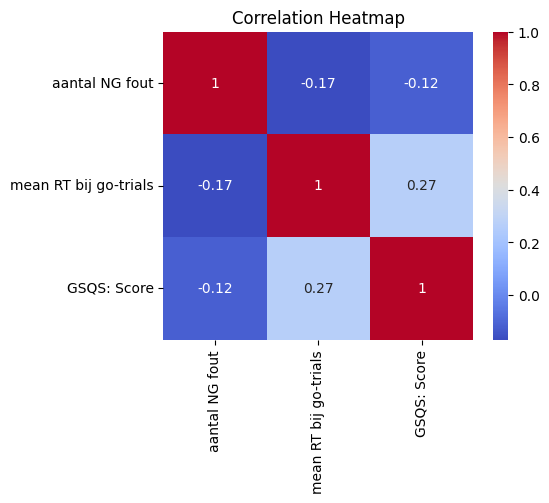

In [18]:
cor_mat = df[['Go-No Go task: Aantal No-Go fout','Go-No Go task: Gemiddelde RT voor de go-trials','GSQS: Score']].corr()
label = 'aantal NG fout','mean RT bij go-trials','GSQS: Score'

plt.figure(figsize=(5, 4))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', xticklabels=label, yticklabels=label)
plt.title('Correlation Heatmap')

plt.show()

In [20]:
p = stats.pearsonr(df['GSQS: Score'], df['Go-No Go task: Aantal No-Go fout'])
print(p)

a = df_f[df_f['Score Group'] == 'normale slaapkwaliteit']['Go-No Go task: Aantal No-Go fout']
b = df_f[df_f['Score Group'] == 'slechte slaapkwaliteit']['Go-No Go task: Aantal No-Go fout']

t_stat, p_value = stats.ttest_ind(a,b)
print(t_stat, p_value)

PearsonRResult(statistic=-0.11597482195786867, pvalue=0.3119484628183834)
-0.20926495765800113 0.8348164215207418
